In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\amita\Desktop\ML Projects\My Projects\Used Car Price Prediction\car data.csv")

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.shape

(301, 9)

In [6]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
dataset.select_dtypes('object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [9]:
len(dataset.select_dtypes('object').columns)

4

In [10]:
dataset.select_dtypes(['int64','float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [11]:
len(dataset.select_dtypes(['int64','float64']).columns)

5

## Dealing with missing Data

In [12]:
dataset.isnull().values.any()

False

In [13]:
dataset.isnull().values.sum()

0

### No Null Values

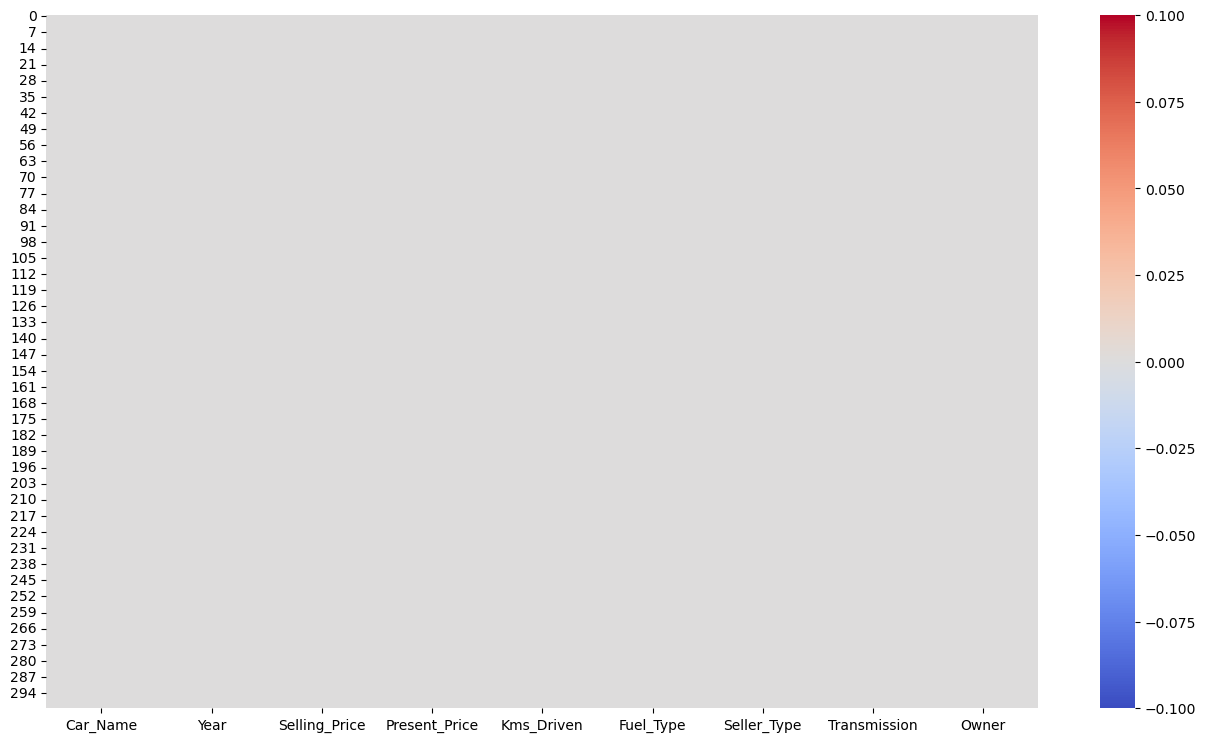

In [14]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull(), cmap='coolwarm')
plt.show()

## Encoding Categorical Columns

In [15]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
dataset = dataset.drop('Car_Name',axis = 1)

In [17]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
# check the number of unique values in each column
print(dataset['Fuel_Type'].nunique())
print(dataset['Seller_Type'].nunique())
print(dataset['Transmission'].nunique())
print(dataset['Owner'].nunique())

3
2
2
3


In [20]:
# Add a col
dataset['Current Year'] = 2024

In [21]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [22]:
dataset['years_old'] = dataset['Current Year'] - dataset['Year']

In [23]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [25]:
dataset = dataset.drop(columns=['Year','Current Year'],axis = 1)

In [26]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [27]:
dataset.shape

(301, 8)

In [28]:
# Encoding categorical
dataset = pd.get_dummies(data = dataset, drop_first=True)

In [29]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [30]:
dataset.shape

(301, 9)

## Corr Matrix

In [33]:
dataset_2 = dataset.drop('Selling_Price', axis = 1)

<Axes: >

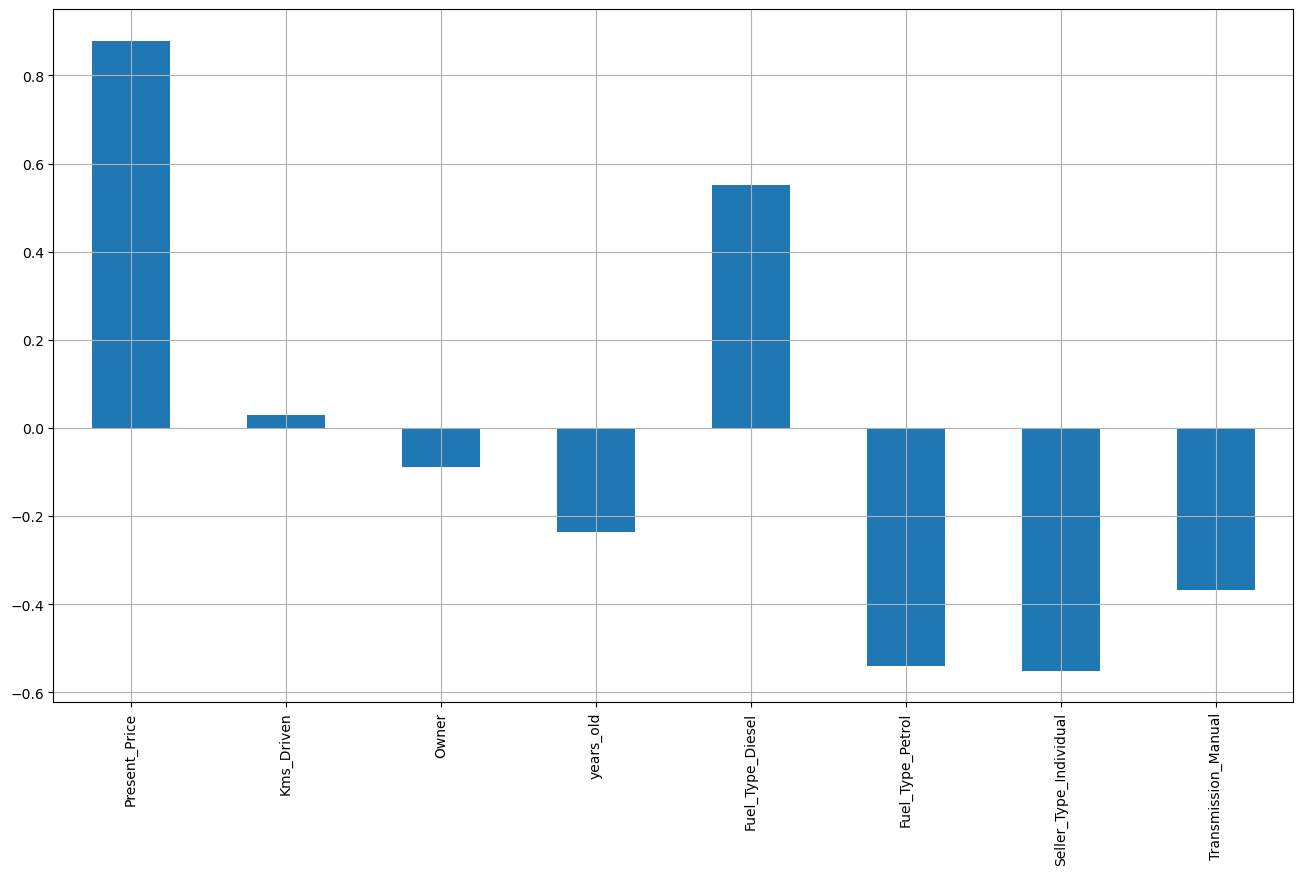

In [34]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
figsize = (16,9), grid = True)

In [35]:
corr = dataset.corr()

<Axes: >

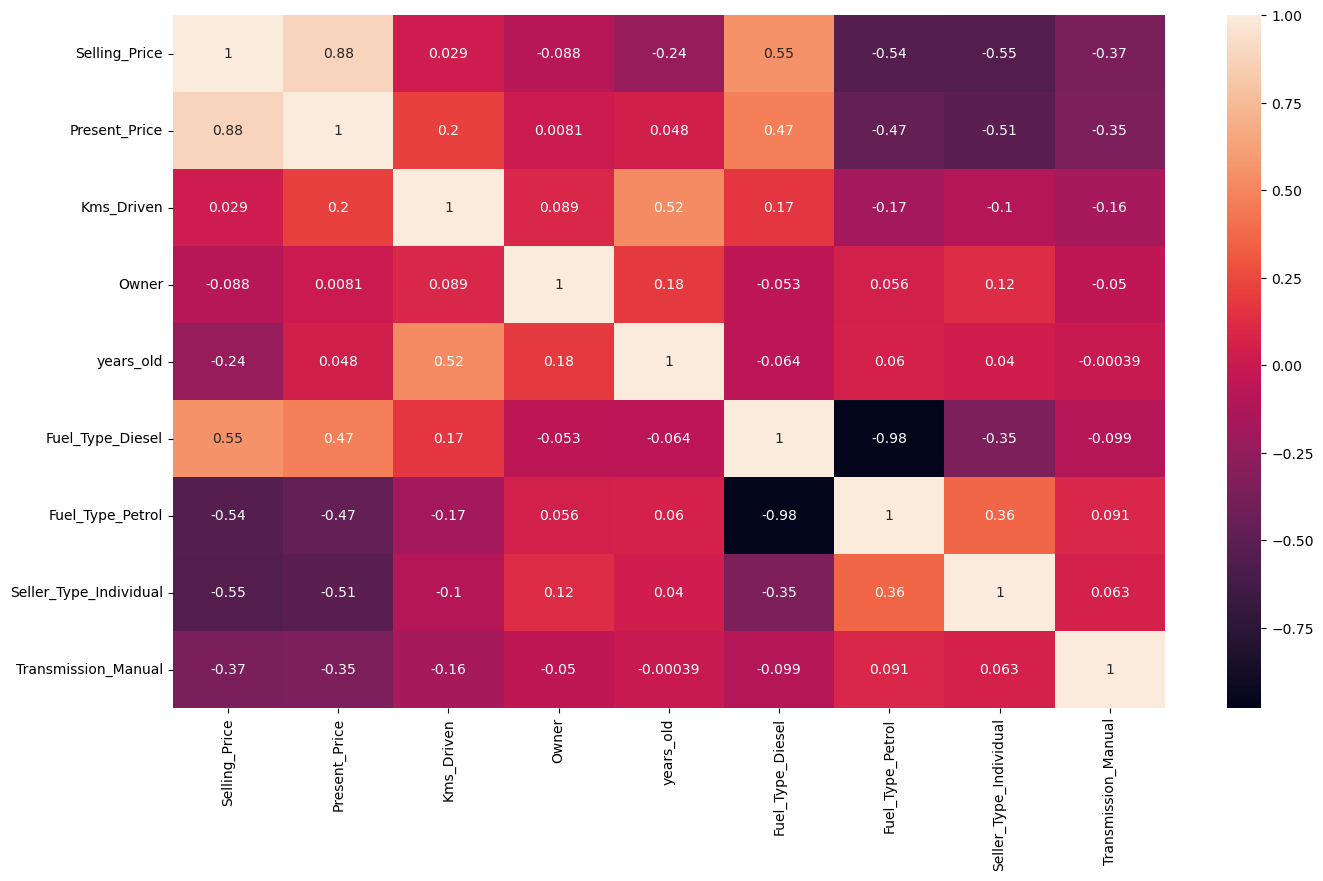

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting Dataset

In [37]:
X = dataset.drop('Selling_Price', axis = 1)

In [38]:
y = dataset['Selling_Price']

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## No Feature Scaling as linear and RF dont necessarily need Feature Scaling

## Building Model

### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = lr_model.predict(X_test)

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,y_pred)

0.914434297222852

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
y_pred = rf_model.predict(X_test)

In [50]:
r2_score(y_test,y_pred)

0.9635334816048546

### RF is predicting much better than linear but we can make it better by fine tuning the hyper parameters

## Hyperparameter tuning using RandomizedSearchCV

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']    
    }

In [57]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [58]:
random_cv = RandomizedSearchCV(estimator=rf_model, param_distributions=parameters,
                    n_iter=10, scoring='neg_mean_absolute_error', cv = 5, verbose=2, n_jobs=-1)

In [59]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\amita\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [60]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=40, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300)

In [61]:
random_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40}

## Final RF Model

In [62]:
regressor = RandomForestRegressor(max_depth=40, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300)
regressor.fit(X_train,y_train)

C:\Users\amita\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=40, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300)

In [63]:
y_pred = regressor.predict(X_test)

In [64]:
r2_score(y_test,y_pred)

0.9448318399464195

## Tuning Didn't help so we keep the default parameters for our RF Model

### Single Prediction

In [65]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [66]:
single_obs = [[5.59,27000,0,10,0,1,0,1]]

In [68]:
print(regressor.predict(single_obs))

C:\Users\amita\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[3.70601029]
